Nessa análise, meu objetivo é encontrar uma possível solução de curto prazo para aumentar a segurança nas rodovias brasileiras.
Dessa forma, vou analisar a planilha de acidentes 2025 da PRF disponível no site de transparência

Com ela posso apontas:

-Tipos mais comuns de acidentes.

-Horários/dias com maior número de ocorrências.

-Mapa de calor de acidentes por região.

-Estados com maiores registro de acidentes



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("dark_background")

In [2]:
dados_brutos = pd.read_csv("acidentes2025_todas_causas_tipos.csv",encoding="latin-1",sep=";")

dados_brutos

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,652468,1467636.0,2025-01-01,quarta-feira,00:30:00,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,...,Não Informado,0.0,0.0,0.0,0.0,"-8,20760697","-34,98372005",SPRF-PE,DEL01-PE,UOP01-DEL01-PE
1,652468,1467635.0,2025-01-01,quarta-feira,00:30:00,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,...,Feminino,0.0,1.0,0.0,0.0,"-8,20760697","-34,98372005",SPRF-PE,DEL01-PE,UOP01-DEL01-PE
2,652468,1467634.0,2025-01-01,quarta-feira,00:30:00,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,...,Masculino,0.0,1.0,0.0,0.0,"-8,20760697","-34,98372005",SPRF-PE,DEL01-PE,UOP01-DEL01-PE
3,652468,1467637.0,2025-01-01,quarta-feira,00:30:00,PE,101.0,"89,5",JABOATAO DOS GUARARAPES,Sim,...,Não Informado,0.0,0.0,0.0,0.0,"-8,20760697","-34,98372005",SPRF-PE,DEL01-PE,UOP01-DEL01-PE
4,652469,1467628.0,2025-01-01,quarta-feira,00:50:00,SC,101.0,120,ITAJAI,Sim,...,Feminino,0.0,1.0,0.0,0.0,"-26,912758","-48,711998",SPRF-SC,DEL04-SC,UOP04-DEL04-SC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182429,691804,1538030.0,2025-03-15,sábado,12:30:00,ES,101.0,67,SAO MATEUS,Sim,...,Masculino,0.0,0.0,1.0,0.0,"-18,72802869","-39,85997558",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
182430,691804,1538029.0,2025-03-15,sábado,12:30:00,ES,101.0,67,SAO MATEUS,Sim,...,Masculino,0.0,0.0,1.0,0.0,"-18,72802869","-39,85997558",SPRF-ES,DEL04-ES,UOP02-DEL04-ES
182431,691875,1538167.0,2025-04-27,domingo,05:00:00,MG,251.0,483,FRANCISCO SA,Sim,...,Masculino,0.0,1.0,0.0,0.0,"-16,479532","-43,5047512",SPRF-MG,DEL12-MG,UOP01-DEL12-MG
182432,691875,1538166.0,2025-04-27,domingo,05:00:00,MG,251.0,483,FRANCISCO SA,Sim,...,Masculino,0.0,1.0,0.0,0.0,"-16,479532","-43,5047512",SPRF-MG,DEL12-MG,UOP01-DEL12-MG


In [3]:
dados_limpos = dados_brutos.drop(
    columns=
    {
            "id",
             "km",
             "municipio",
             "causa_principal",
             "ilesos",
             "feridos_leves",
             "feridos_graves",
             "latitude",
             "longitude",
             "regional",
             "delegacia",
             "uop",
             "br",
             "ordem_tipo_acidente",
             "classificacao_acidente",
             "uso_solo",
             "id_veiculo",
             "marca",
             "ano_fabricacao_veiculo",
             "tipo_envolvido",
             "estado_fisico",
             "sentido_via",
             "condicao_metereologica",
             "tipo_pista",
             "tracado_via",
             "pesid"

    }
    )

dados_limpos

,data_inversa,dia_semana,horario,uf,causa_acidente,tipo_acidente,fase_dia,tipo_veiculo,idade,sexo,mortos
0,2025-01-01,quarta-feira,00:30:00,PE,Reação tardia ou ineficiente do condutor,Colisão traseira,Plena Noite,Automóvel,NaN,Não Informado,0.0
1,2025-01-01,quarta-feira,00:30:00,PE,Reação tardia ou ineficiente do condutor,Colisão traseira,Plena Noite,Motocicleta,28.0,Feminino,0.0
2,2025-01-01,quarta-feira,00:30:00,PE,Reação tardia ou ineficiente do condutor,Colisão traseira,Plena Noite,Motocicleta,29.0,Masculino,0.0
3,2025-01-01,quarta-feira,00:30:00,PE,Reação tardia ou ineficiente do condutor,Colisão traseira,Plena Noite,NaN,NaN,Não Informado,0.0
4,2025-01-01,quarta-feira,00:50:00,SC,Ausência de reação do condutor,Tombamento,Plena Noite,Motocicleta,24.0,Feminino,0.0
...,...,...,...,...,...,...,...,...,...,...,...
182429,2025-03-15,sábado,12:30:00,ES,Condutor desrespeitou a iluminação vermelha do...,Colisão transversal,Pleno dia,Automóvel,66.0,Masculino,0.0
182430,2025-03-15,sábado,12:30:00,ES,Condutor desrespeitou a iluminação vermelha do...,Colisão transversal,Pleno dia,Automóvel,49.0,Masculino,0.0
182431,2025-04-27,domingo,05:00:00,MG,Condutor Dormindo,Saída de leito carroçável,Amanhecer,Automóvel,31.0,Masculino,0.0
182432,2025-04-27,domingo,05:00:00,MG,Condutor Dormindo,Saída de leito carroçável,Amanhecer,Automóvel,34.0,Masculino,0.0


In [4]:
dados_limpos["data_inversa"] = pd.to_datetime(dados_limpos["data_inversa"])

dados_limpos

,data_inversa,dia_semana,horario,uf,causa_acidente,tipo_acidente,fase_dia,tipo_veiculo,idade,sexo,mortos
0,2025-01-01,quarta-feira,00:30:00,PE,Reação tardia ou ineficiente do condutor,Colisão traseira,Plena Noite,Automóvel,NaN,Não Informado,0.0
1,2025-01-01,quarta-feira,00:30:00,PE,Reação tardia ou ineficiente do condutor,Colisão traseira,Plena Noite,Motocicleta,28.0,Feminino,0.0
2,2025-01-01,quarta-feira,00:30:00,PE,Reação tardia ou ineficiente do condutor,Colisão traseira,Plena Noite,Motocicleta,29.0,Masculino,0.0
3,2025-01-01,quarta-feira,00:30:00,PE,Reação tardia ou ineficiente do condutor,Colisão traseira,Plena Noite,NaN,NaN,Não Informado,0.0
4,2025-01-01,quarta-feira,00:50:00,SC,Ausência de reação do condutor,Tombamento,Plena Noite,Motocicleta,24.0,Feminino,0.0
...,...,...,...,...,...,...,...,...,...,...,...
182429,2025-03-15,sábado,12:30:00,ES,Condutor desrespeitou a iluminação vermelha do...,Colisão transversal,Pleno dia,Automóvel,66.0,Masculino,0.0
182430,2025-03-15,sábado,12:30:00,ES,Condutor desrespeitou a iluminação vermelha do...,Colisão transversal,Pleno dia,Automóvel,49.0,Masculino,0.0
182431,2025-04-27,domingo,05:00:00,MG,Condutor Dormindo,Saída de leito carroçável,Amanhecer,Automóvel,31.0,Masculino,0.0
182432,2025-04-27,domingo,05:00:00,MG,Condutor Dormindo,Saída de leito carroçável,Amanhecer,Automóvel,34.0,Masculino,0.0


____Maiores_Tipos_de_acidentes____



,Ocorrencias
tipo_acidente,
Colisão traseira,26544
Tombamento,25246
Saída de leito carroçável,23509
Queda de ocupante de veículo,22880
Colisão transversal,14664
Colisão com objeto,14256
Colisão lateral mesmo sentido,13348
Colisão frontal,12519
Capotamento,8607


<Figure size 1000x500 with 0 Axes>

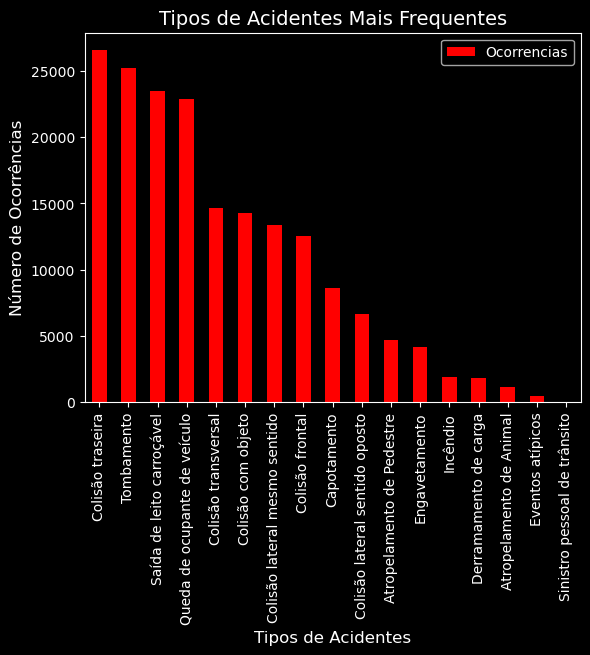

In [5]:
contagem = dados_limpos["tipo_acidente"].value_counts()

contagem = pd.DataFrame(contagem)
contagem = contagem.rename(columns={"count":"Ocorrencias"})

print("____Maiores_Tipos_de_acidentes____\n")
display(contagem)

plt.figure(figsize=(10,5))

contagem.plot(kind="bar", color = [
    "red","darkred","maroon","firebrick",
    "brown","indianred","lightcoral","peachpuff",
    "rosybrown","salmon","tomato","darksalmon","coral",
    "lightsalmon","mistyrose","snow","white"
    ])

plt.title("Tipos de Acidentes Mais Frequentes",fontsize = 14)
plt.xlabel("Tipos de Acidentes",fontsize=12)
plt.ylabel("Número de Ocorrências",fontsize=12)


plt.show()

__Fases_do_Dia_com_Maiores_Ocorrências__



,Ocorrências
fase_dia,
Pleno dia,104340
Plena Noite,58227
Anoitecer,10667
Amanhecer,9200


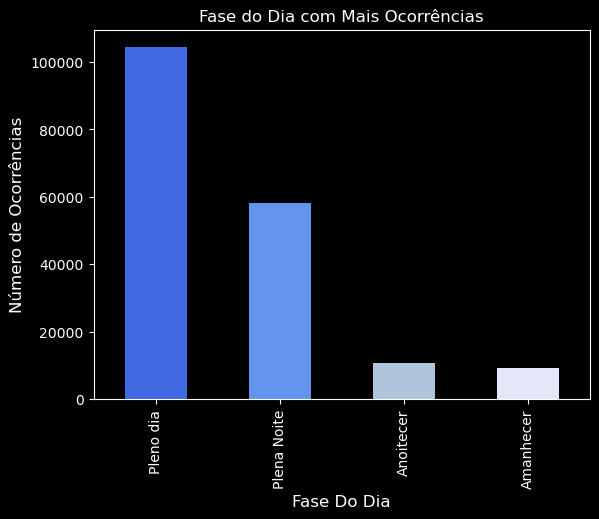

In [6]:
fase_do_dia = dados_limpos["fase_dia"].value_counts()

fase_do_dia = pd.DataFrame(fase_do_dia)

fase_do_dia = fase_do_dia.rename(columns={"count":"Ocorrências"})

print("__Fases_do_Dia_com_Maiores_Ocorrências__\n")
display(fase_do_dia)

plt.Figure(figsize=(10,5))
fase_do_dia["Ocorrências"].plot(kind="bar",color=["royalblue","cornflowerblue","lightsteelblue","lavender"])

plt.title("Fase do Dia com Mais Ocorrências")
plt.xlabel("Fase Do Dia",fontsize=12)
plt.ylabel("Número de Ocorrências",fontsize=12)


plt.show()

,Ocorrencias
dia_semana,
sábado,28907
domingo,28557
sexta-feira,28470
quinta-feira,25259
segunda-feira,25186
quarta-feira,23844
terça-feira,22211


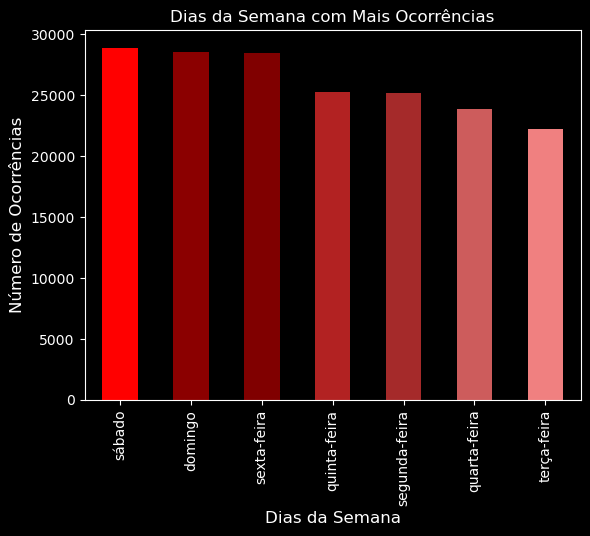

In [7]:
dia_semana = dados_limpos["dia_semana"].value_counts()

dia_semana = pd.DataFrame(dia_semana)

dia_semana = dia_semana.rename(columns={"count" : "Ocorrencias"})

display(dia_semana)

plt.Figure(figsize=(15,5))
dia_semana["Ocorrencias"].plot(kind="bar",color=["red","darkred","maroon","firebrick","brown","indianred","lightcoral"])

plt.title("Dias da Semana com Mais Ocorrências")
plt.xlabel("Dias da Semana",fontsize=12)
plt.ylabel("Número de Ocorrências",fontsize=12)

plt.show()

Ocorrências por região:


,Norte,Nordeste,Sul,Sudeste,Centro-oeste
0,13980,40208,52490,50059,25697


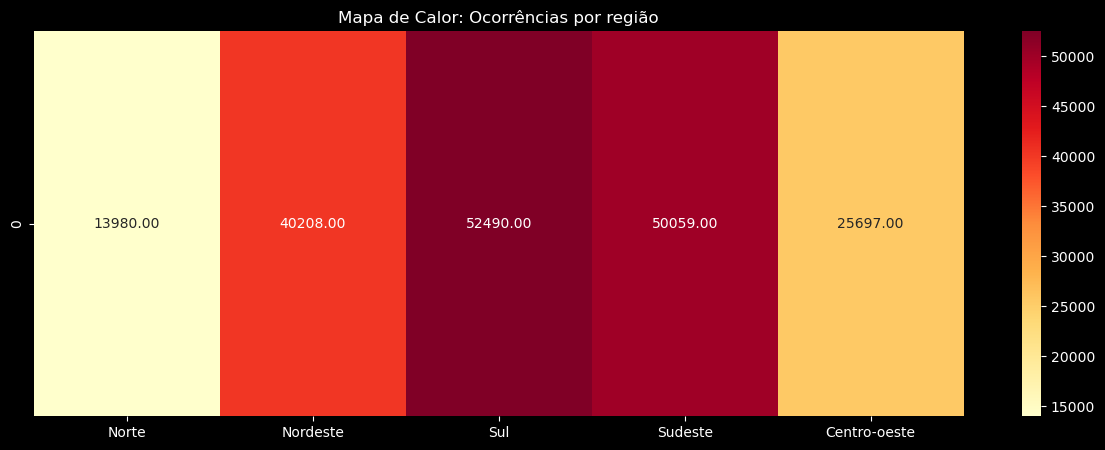

In [8]:
import seaborn as sns

regioes = {
    "Norte": 0,  
    "Nordeste": 0,
    "Sul": 0,
    "Sudeste": 0,
    "Centro-oeste": 0
}

for uf in dados_limpos["uf"]:
    match uf:
        case "GO"|"DF"|"MT"|"MS":
            regioes["Centro-oeste"] += 1
        case "RS"|"SC"|"PR":
            regioes["Sul"] += 1
        case "SP"|"RJ"|"MG"|"ES":
            regioes["Sudeste"] += 1
        case "BA"|"CE"|"PI"|"SE"|"AL"|"MA"|"RN"|"PB"|"PE":
            regioes["Nordeste"] += 1
        case "AC"|"RO"|"AM"|"PA"|"RR"|"AP"|"TO":
            regioes["Norte"] += 1

print("Ocorrências por região:")
ocorrencias_por_regiao = pd.DataFrame(regioes,index=[0])
display(ocorrencias_por_regiao)

plt.figure(figsize=(15,5))
sns.heatmap(ocorrencias_por_regiao,annot=True,fmt=".2f",cmap="YlOrRd")
plt.title('Mapa de Calor: Ocorrências por região')

plt.show()

Maiores ocorrências por Estados


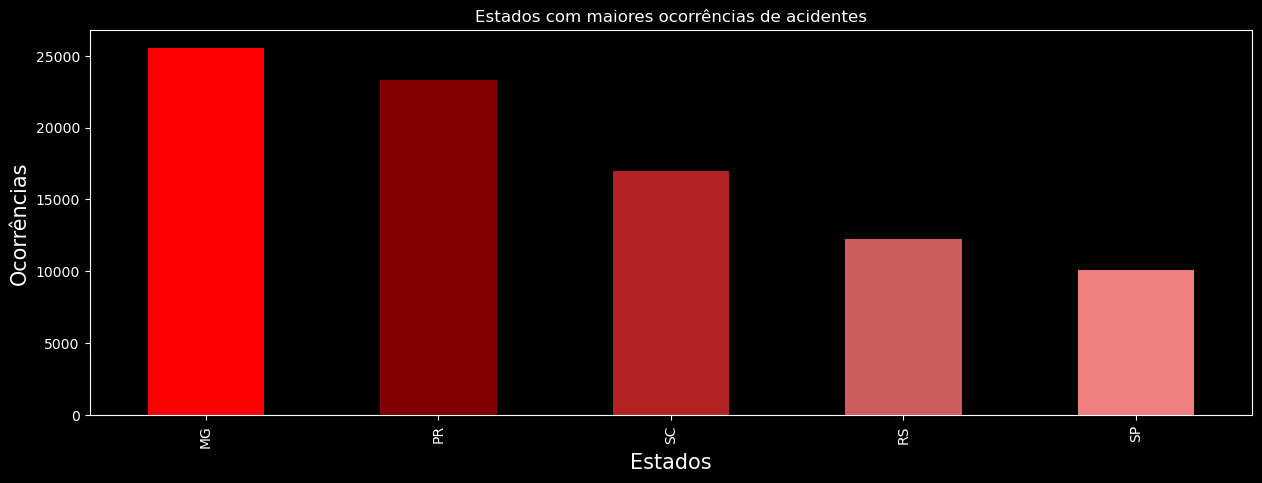

,Ocorrencias
uf,
MG,25518
PR,23291
SC,16957
RS,12242
SP,10103


In [9]:
ocorrencias_por_estado = dados_limpos["uf"].value_counts()
ocorrencias_por_estado = pd.DataFrame(ocorrencias_por_estado)
ocorrencias_por_estado = ocorrencias_por_estado.rename(columns={"count":"Ocorrencias"})

print("Maiores ocorrências por Estados")

cinco_maiores_estados = ocorrencias_por_estado.head()

plt.figure(figsize=(15,5))

cinco_maiores_estados["Ocorrencias"].plot(kind="bar",color=["Red","Maroon","firebrick","indianred","lightcoral"])

plt.xlabel("Estados",fontsize=15)
plt.ylabel("Ocorrências",fontsize=15)
plt.title("Estados com maiores ocorrências de acidentes")

plt.show()
display(cinco_maiores_estados)

Principais causas de Acidentes


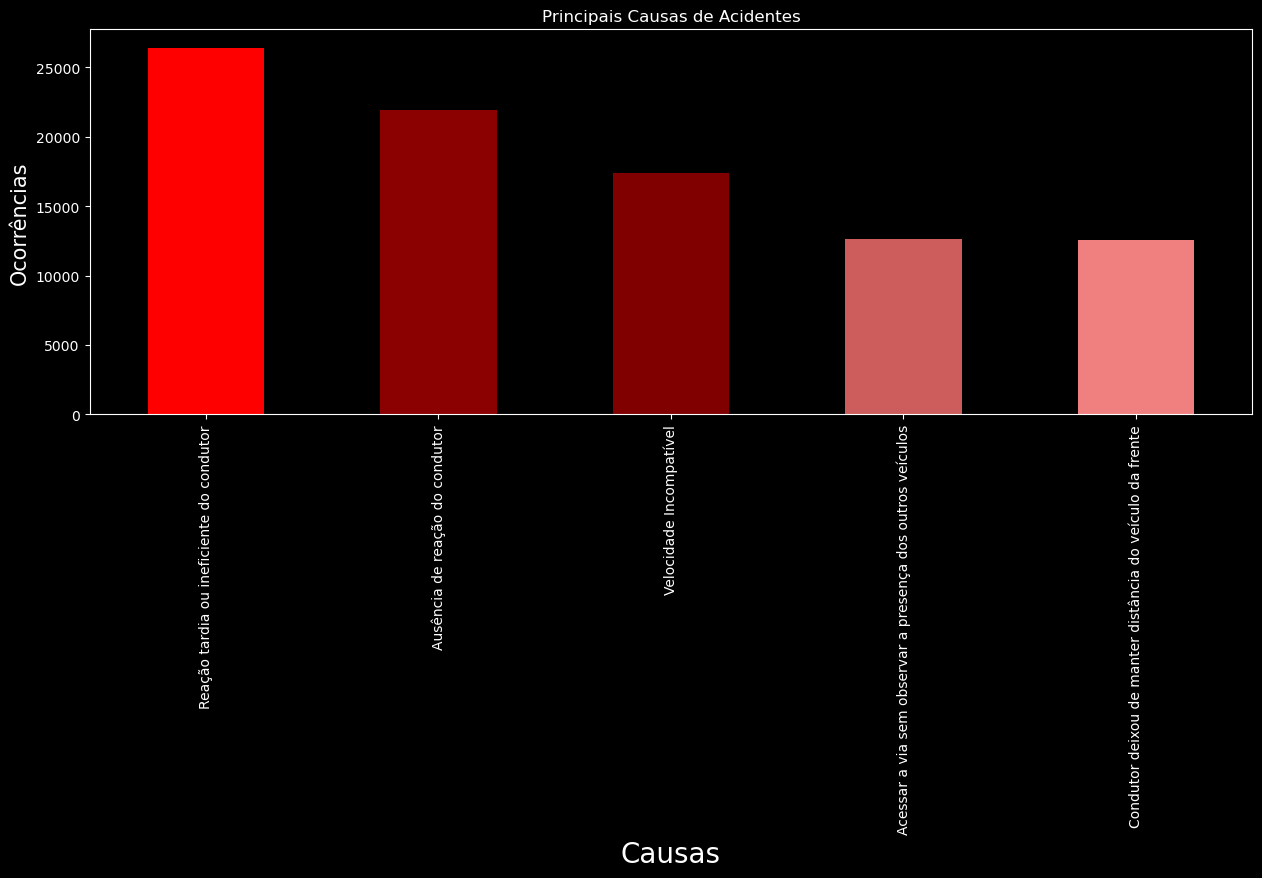

In [10]:
causa_dos_acidentes = dados_limpos["causa_acidente"].value_counts()

causa_dos_acidentes = pd.DataFrame(causa_dos_acidentes)

principais_causas_acidentes = causa_dos_acidentes.head()

print("Principais causas de Acidentes")

plt.figure(figsize=(15,5))
principais_causas_acidentes["count"].plot(kind="bar",color=["red","darkred","maroon","indianred","lightcoral"])

plt.title("Principais Causas de Acidentes")

plt.xlabel("Causas",fontsize=20)
plt.ylabel("Ocorrências",fontsize=15)

plt.show()





Tipos de veículos mais envolvidos em acidentes


,count
tipo_veiculo,
Automóvel,60759
Motocicleta,36052
Caminhonete,16028
Semireboque,15358
Caminhão-trator,13110
Caminhão,10601
Ônibus,7948
Camioneta,4861
Motoneta,3567


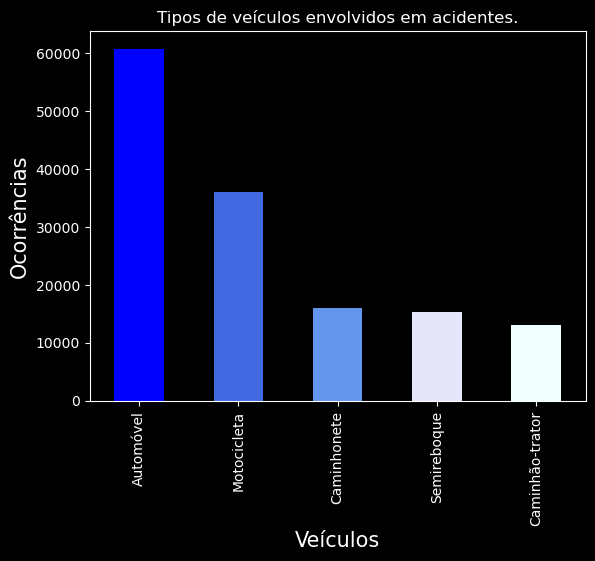

In [11]:
tipos_veiculos = dados_limpos["tipo_veiculo"].value_counts()

print("Tipos de veículos mais envolvidos em acidentes")

tipos_veiculos = pd.DataFrame(tipos_veiculos)

display(tipos_veiculos)

plt.Figure(figsize=(15,5))

plt.title("Tipos de veículos envolvidos em acidentes.")

tipos_veiculos["count"].head().plot(kind="bar",color=["Blue","royalblue","cornflowerblue","lavender","azure"])
plt.xlabel("Veículos",fontsize=15)
plt.ylabel("Ocorrências",fontsize=15)

plt.show()


Conclusões:

Principais causas: Ineficiência do condutor ou tempo de reação baixo, ausência de reação do condutor e velocidade incompatível

Dias da semana: o final de semana se destaca. (Sexta, sábado e Domingo)

Dessa forma, o consumo de bebidas alcólicas pode estar relacionado ao aumento de casos de acidentes aos finais de semana,já que o condutor embreagado perde a usa eficiência no transito e as principais causas podem ser consequencia do consumo de bebidas alcólicas.

Tipos de acidentes temos uma certa equivalência na quantidade de ocorrências. Colisão traseira e Tombamento se destacando dos demais.

Regiões com maiores ocorrências: Temos o Sul e o Sudeste bem próximos em números absolutos. Analogamente, os Estados seguem o mesmo ritmo que as regiões, nesse caso, temos Minas Gerais e Paraná em destaque.

Por fim, em tipos de veículos envolvidos em acidentes, os automóveis estão disparados na frente dos demais.

Segundo a Agência de Notícias da Industria, 67% das rodovias do Brasil foram classificadas com regulares, ruins ou péssimas. E isso é bem preocupante, uma vez que mais da metade da malha rodoviária brasileira é regular ou abaixo disso.

Logo, é bem justo concordar com a pesquisa publicada pelo site G1 que classifica o Brasil como o 3° país com acidentes mais mortais do mundo, em 2023.

Possíveis soluções:

O Brasil deve investir cada vez mais no modal ferroviário para diminuir a frota de caminhões cargueiros. Dessa forma, as rodovias sofreram menos com o transporte de larga escala. Além disso, o transporte ferroviário é bem mais eficaz que o rodoviário e se mostra mais economico no longo prazo.

Fortalecer a fiscalização e aumentar a pena que a Lei Seca pune. Assim, os números de acidentes envolvendo condutores embriagados diminuirá.

Além disso, motoristas com várias horas de transito direto, acumulam uma alta carga de fadiga. Logo, um projeto de lei que obrigue os motoristas a terem horas de transito física que não gerem fadigas como distração e estresse. 
